# Understanding the Covariance Matrix
https://datascienceplus.com/understanding-the-covariance-matrix/

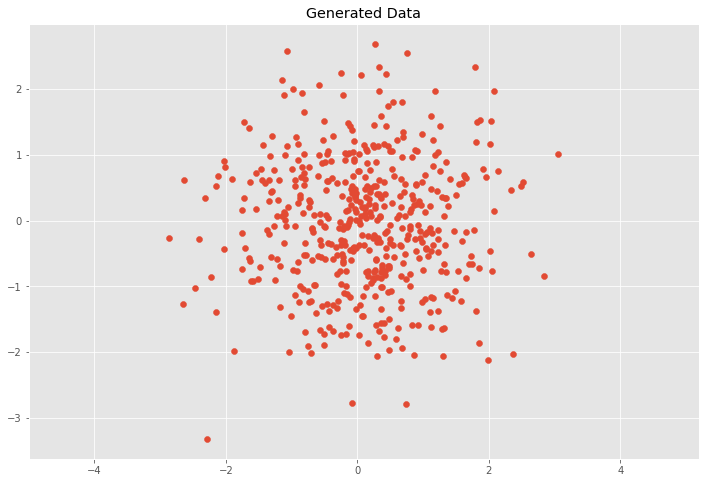

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T
# X = np.hstack((x, y))

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');

In [13]:
x[10:15]

array([ 0.33104497,  0.66002427,  1.65030975,  1.34151883, -0.54120913])

In [9]:
X.shape, x.shape

((500, 2), (500,))

In [16]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    print(X.shape, X[0].shape)
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

(2, 500) (500,)


array([[ 9.95740327e-01, -9.18404567e-04],
       [-9.18404567e-04,  9.66505735e-01]])

In [15]:
np.cov(X.T)

array([[ 9.95740327e-01, -9.18404567e-04],
       [-9.18404567e-04,  9.66505735e-01]])

## Linear Transformations of the Data Set

(2, 500) (500,)


array([[ 4.87912760e-01, -2.18580287e-03],
       [-2.18580287e-03,  1.11728063e+01]])

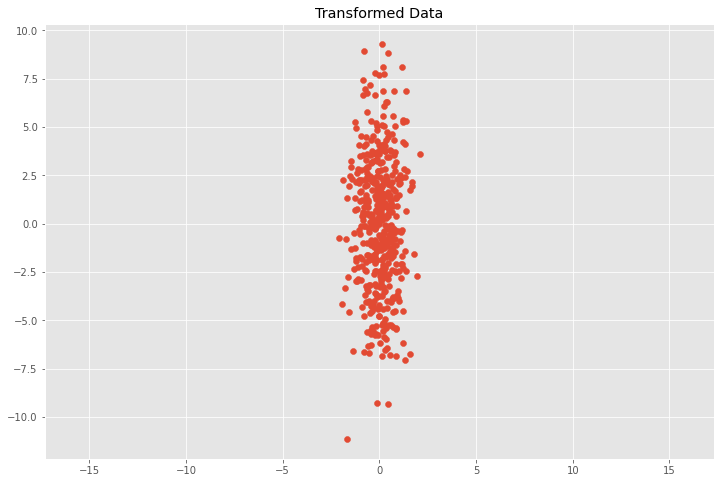

In [19]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

(2, 500) (500,)


array([[ 5.16294196, -5.30059393],
       [-5.30059393,  6.49777709]])

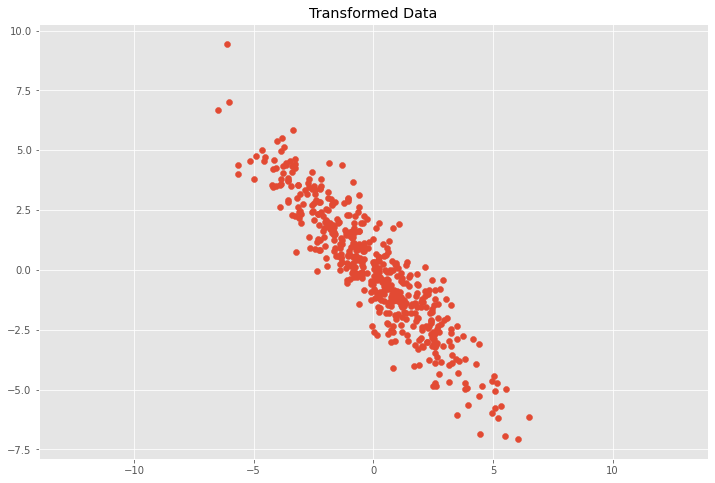

In [18]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

# Calculate covariance matrix
cov_mat(Y.T)

## Eigen Decomposition of the Covariance Matrix